In [85]:
import sys
sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import simplefilter
simplefilter('ignore')

In [60]:
oil = pd.read_csv('../data/oil.csv', index_col='date')
print(f"shape = {oil.shape}")
oil.head()

shape = (1218, 1)


,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


Incluye valores durante los períodos de tiempo de los datos del train y test. (Ecuador es un país dependiente del petróleo y su salud económica es altamente vulnerable a los impactos en los precios del petróleo).

### Time step feature

In [61]:
oil_tt = oil.copy()
oil_tt['NA'] = oil_tt['dcoilwtico'].isna()
oil_tt.fillna(method='backfill', inplace=True)
oil_tt['Time'] = np.arange(len(oil_tt))
oil_tt.head()

,dcoilwtico,NA,Time
date,,,
2013-01-01,93.14,True,0
2013-01-02,93.14,False,1
2013-01-03,92.97,False,2
2013-01-04,93.12,False,3
2013-01-07,93.20,False,4


Text(0.5, 1.0, 'Time Plot of dcoilwtico Sales')

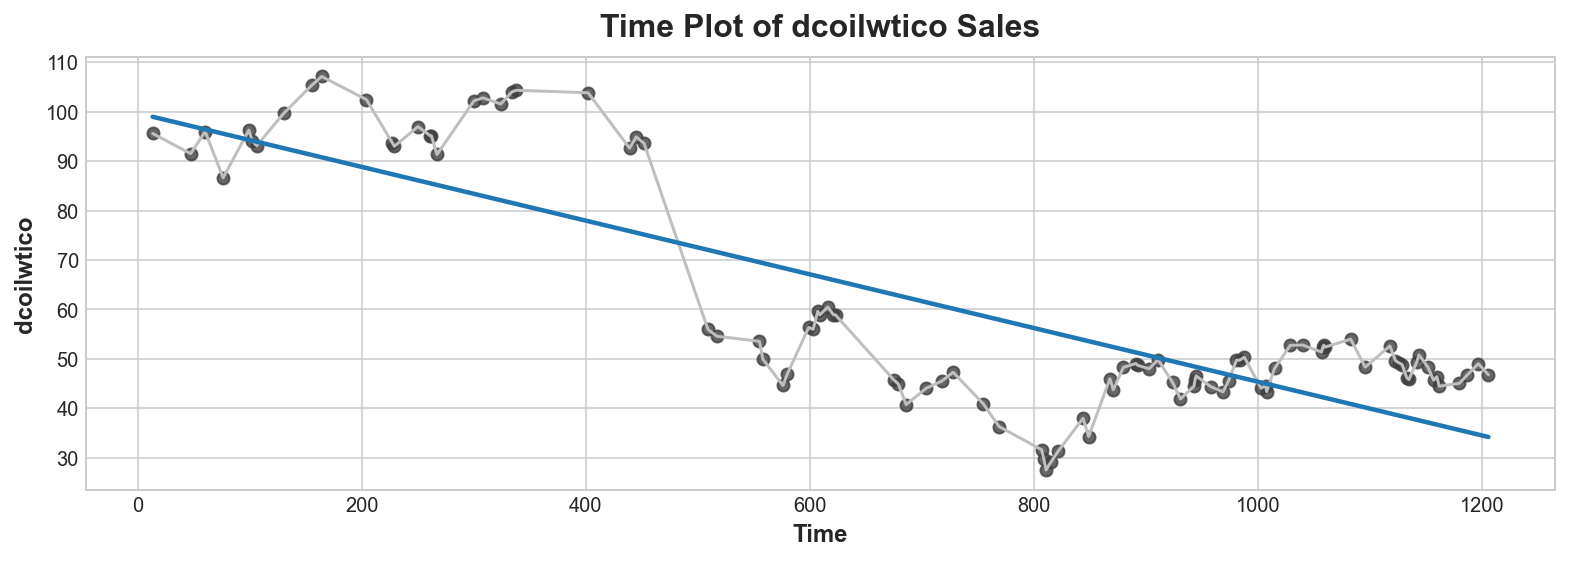

In [62]:
sample = oil_tt.sample(100).sort_values('Time')

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'dcoilwtico', data=sample, color='0.75')
ax = sns.regplot(x='Time', y='dcoilwtico', data=sample, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of dcoilwtico Sales')

### Lag Feature

In [63]:
oil_lag = oil.copy()
oil_lag.fillna(method='backfill', inplace=True)
oil_lag['lag_feature'] = oil_lag.shift(1)
oil_lag.head()

,dcoilwtico,lag_feature
date,,
2013-01-01,93.14,NaN
2013-01-02,93.14,93.14
2013-01-03,92.97,93.14
2013-01-04,93.12,92.97
2013-01-07,93.20,93.12


Text(0.5, 1.0, 'Lag feature plot')

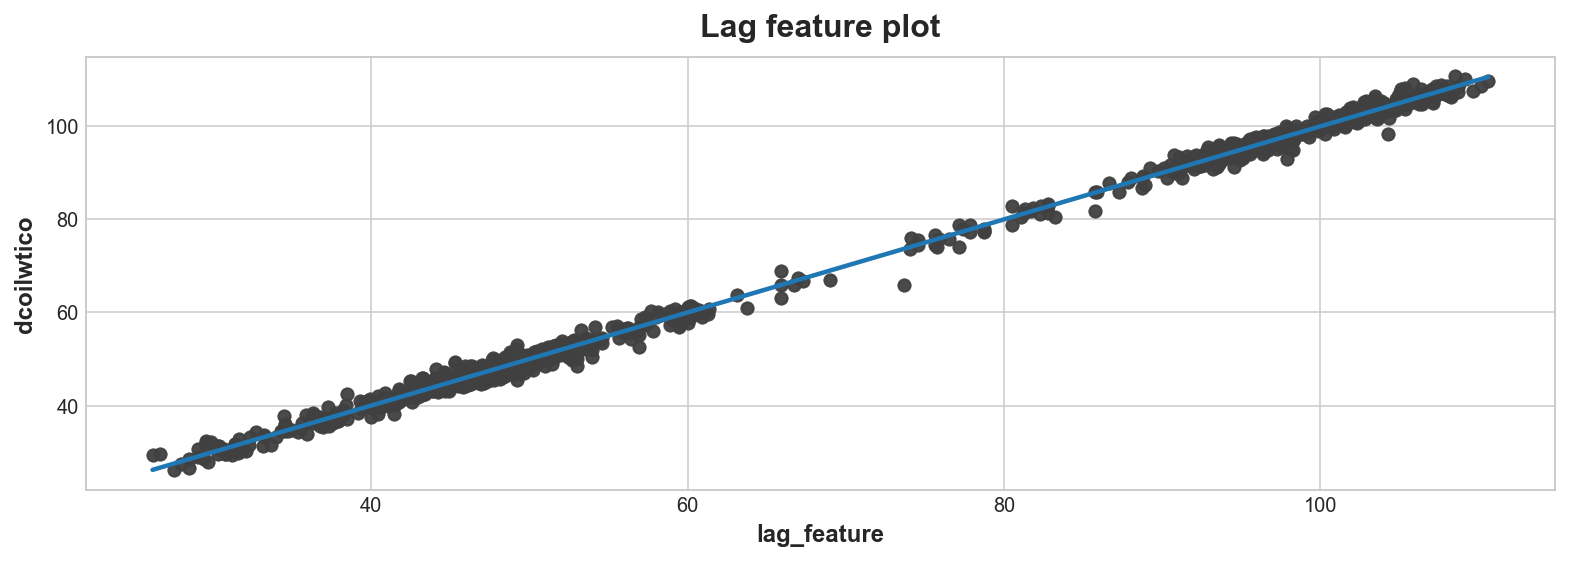

In [64]:
fig, ax = plt.subplots()
ax.scatter('lag_feature', 'dcoilwtico', data=oil_lag, color='0.45')
sns.regplot(x='lag_feature',y= 'dcoilwtico', data=oil_lag, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Lag feature plot')

### Holidays events

In [65]:
holidays = pd.read_csv('../data/holidays_events.csv', index_col='date')
print(f'Shape = {holidays.shape}')
holidays.head()

Shape = (350, 5)


,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [75]:
holidays[holidays.transferred == True]

,type,locale,locale_name,description,transferred
date,,,,,
2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True


Los **transferred** == True son eventos que movio el govierno a otro dia comun

Text(0.5, 1.0, 'Tipo de eventos')

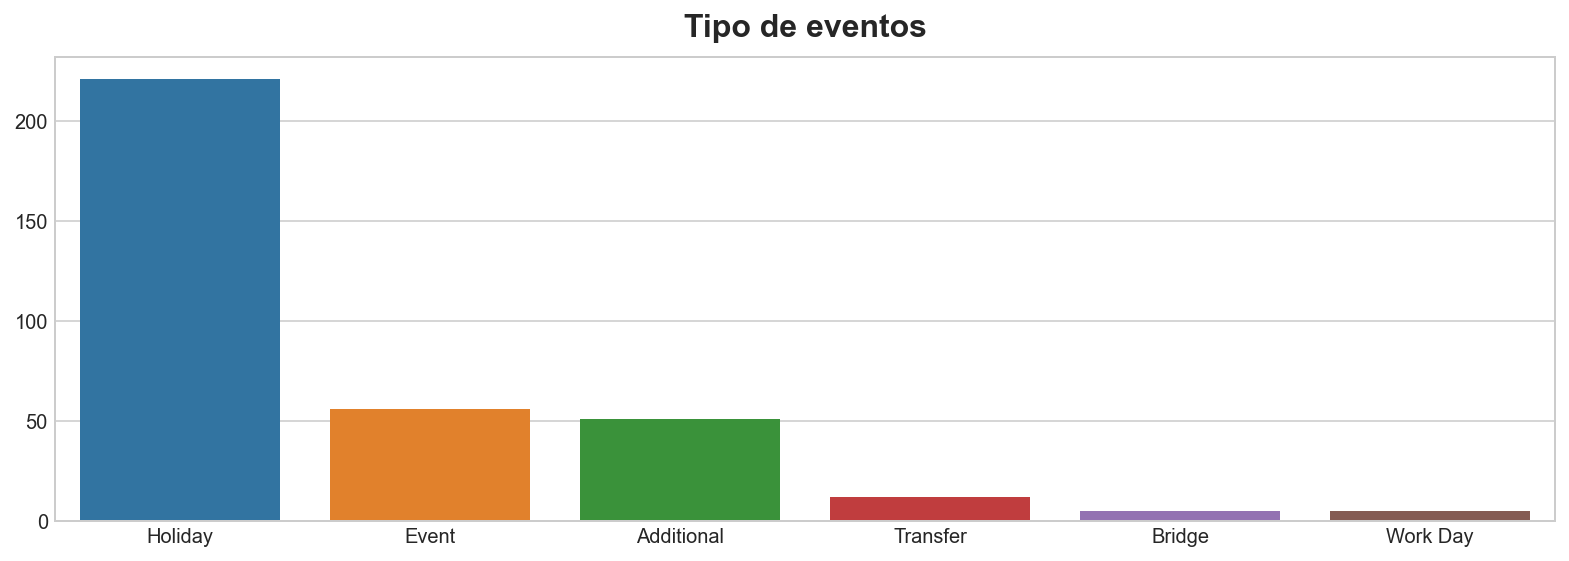

In [70]:
fig, ax = plt.subplots()
sns.barplot(x=holidays['type'].value_counts().index, y=holidays['type'].value_counts().values)
ax.set_title('Tipo de eventos')

* **Additional**: Son días que se agregan a un feriado regular del calendario, por ejemplo, como suele suceder alrededor de Navidad (haciendo que la Nochebuena sea un feriado)
* **Transfer**: Dias festivos que el govierno movio de fecha (coincide con los dias tranferred = True)
* **Bridge**: Dias son dias extras que se añadieron a una festividad. (Puente)
* **Work Day**: Dias de trabajos cubriendo los putntes (Bridge)

Text(0.5, 1.0, 'Tipo de locales')

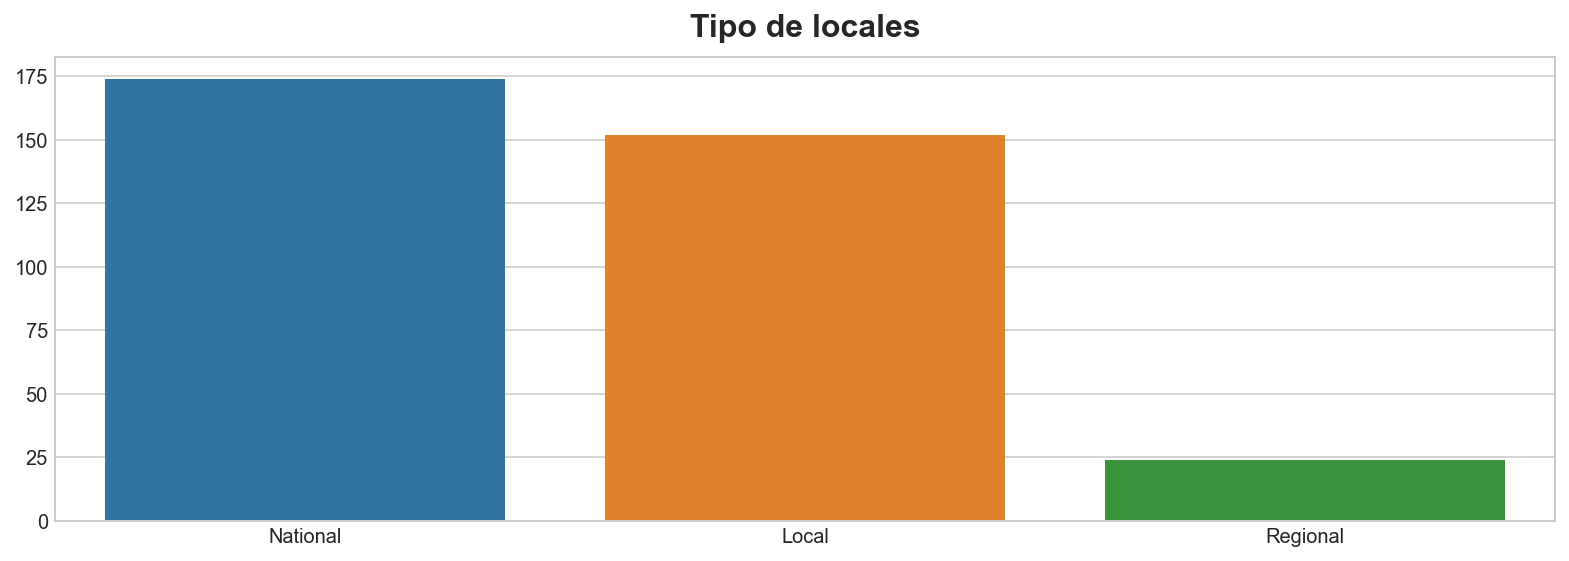

In [71]:
fig, ax = plt.subplots()
sns.barplot(x=holidays['locale'].value_counts().index, y=holidays['locale'].value_counts().values)
ax.set_title('Tipo de locales')

### Stores

In [92]:
stores = pd.read_csv('../data/stores.csv')
stores.head(20)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


* Almacene metadatos, incluidos ciudad, estado, tipo y clúster.
* cluster es una agrupación de tiendas similares.

Text(0.5, 1.0, 'Ciudades')

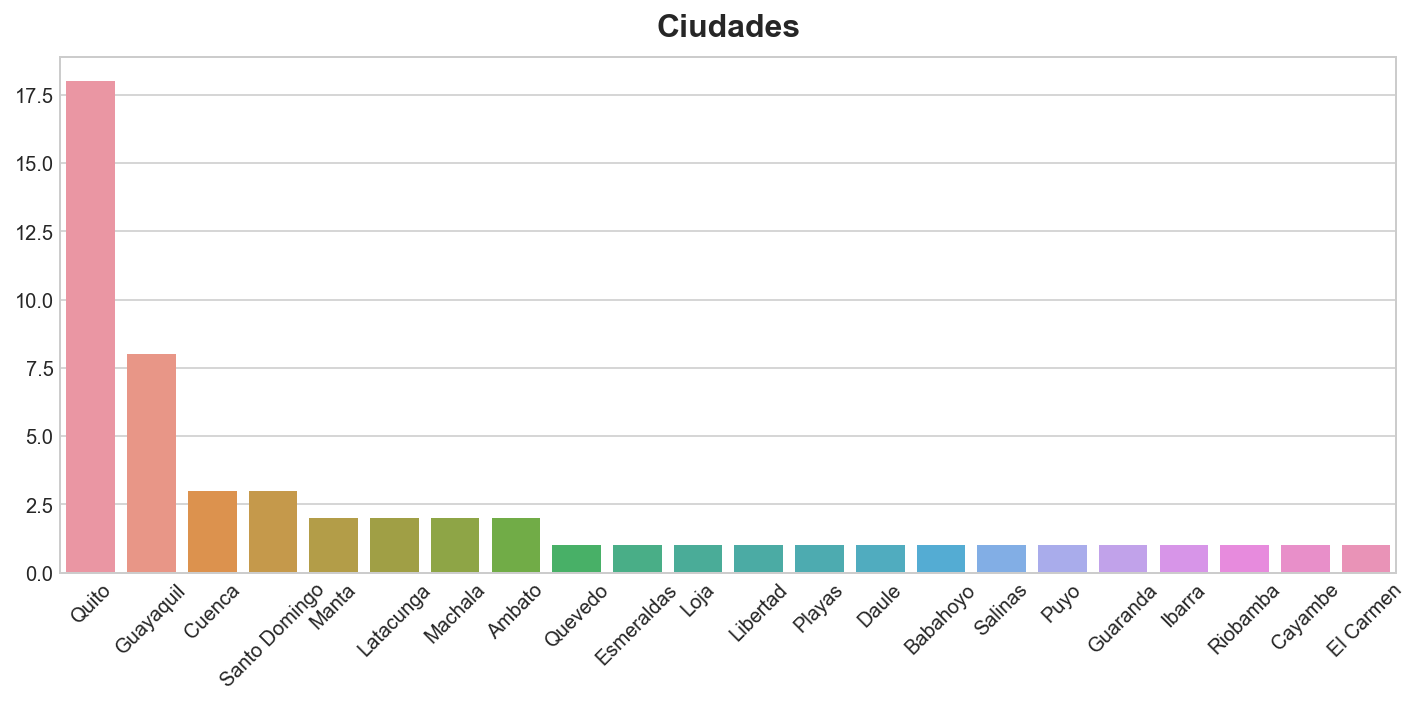

In [89]:
plt.figure(figsize=(10,5))
sns.barplot(x=stores['city'].value_counts().index, y=stores['city'].value_counts().values)
plt.xticks(rotation=45)
plt.title('Ciudades')

Text(0.5, 1.0, 'Estados')

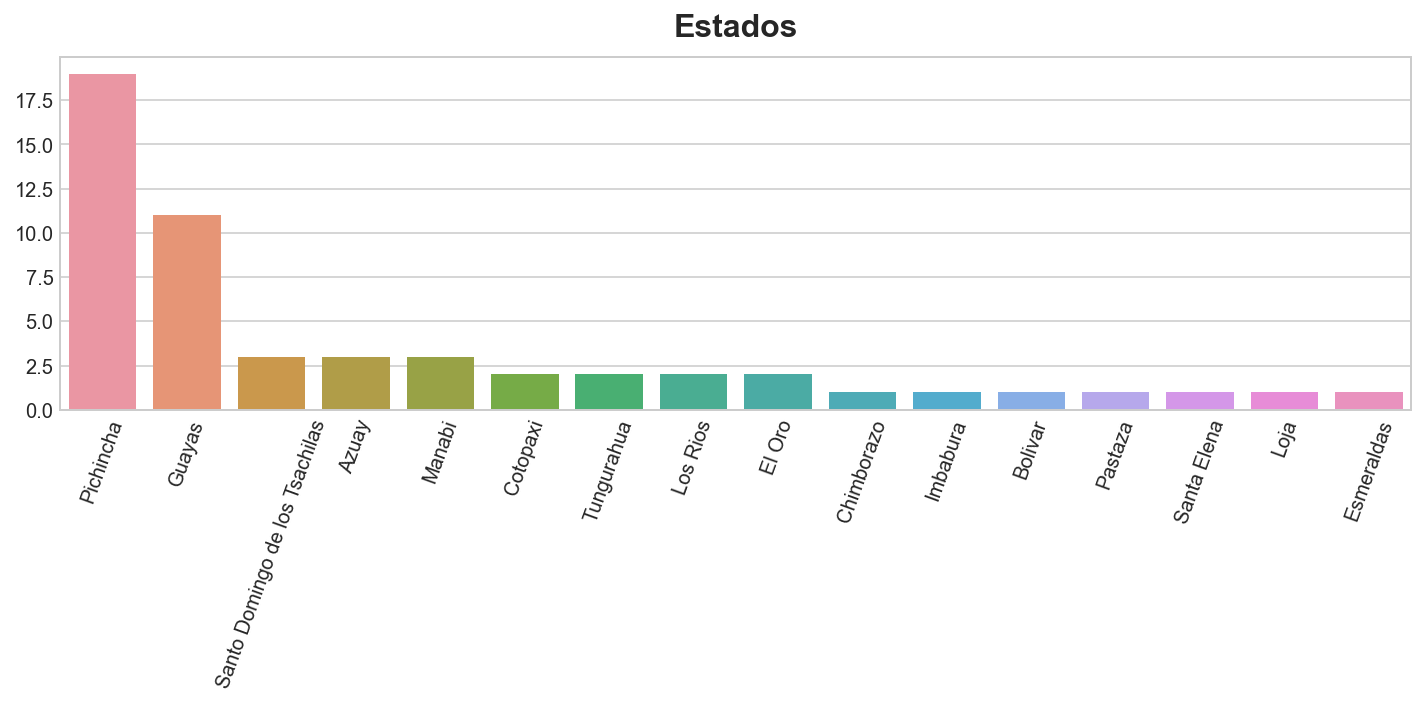

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(x=stores['state'].value_counts().index, y=stores['state'].value_counts().values)
plt.xticks(rotation=70)
plt.title('Estados')

Text(0.5, 1.0, 'Tipos')

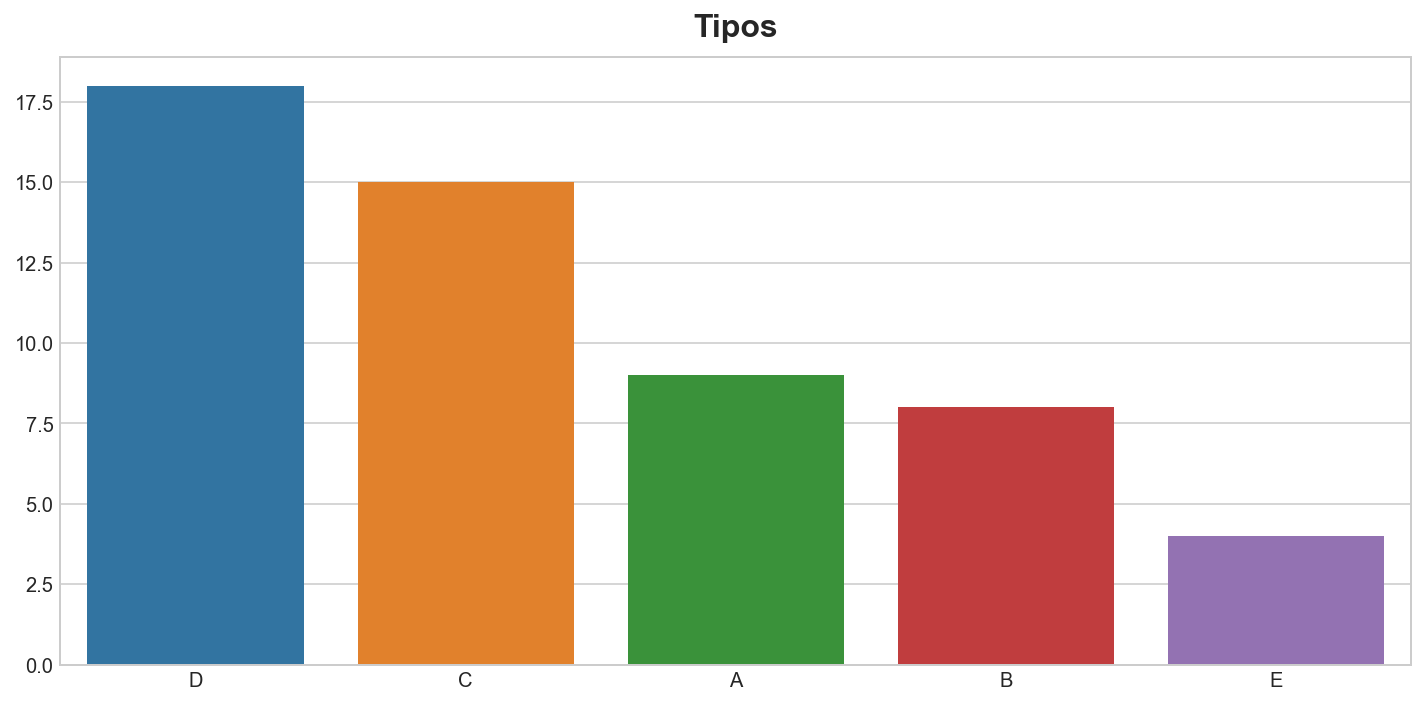

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(x=stores['type'].value_counts().index, y=stores['type'].value_counts().values)
plt.title('Tipos')

Text(0.5, 1.0, 'Tipos')

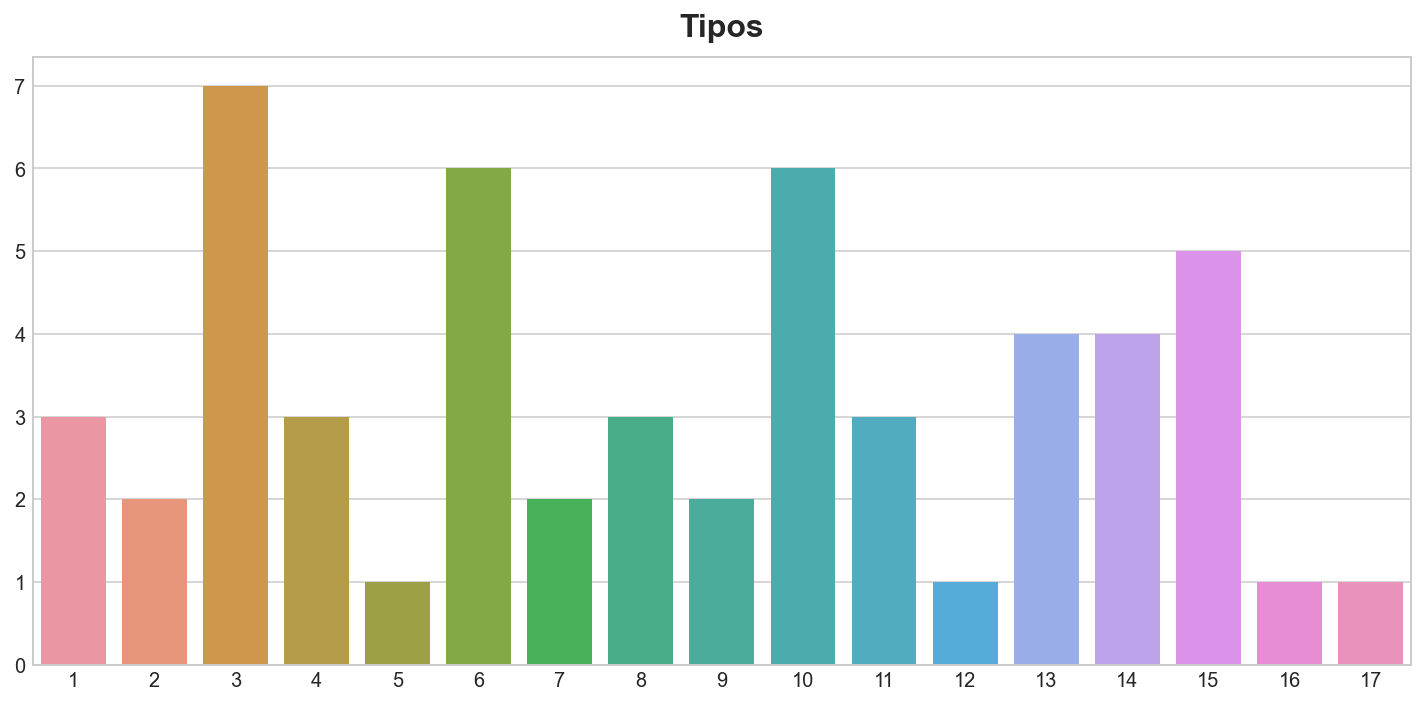

In [96]:
plt.figure(figsize=(10,5))
sns.barplot(x=stores['cluster'].value_counts().index, y=stores['cluster'].value_counts().values)
plt.title('Tipos')

### Additional Notes
* Los salarios en el sector público se pagan cada dos semanas el día 15 y el último día del mes. Las ventas de los supermercados podrían verse afectadas por esto.
* Un terremoto de magnitud 7,8 golpeó a Ecuador el 16 de abril de 2016. La gente se unió a los esfuerzos de socorro donando agua y otros productos de primera necesidad que afectaron enormemente las ventas de los supermercados durante varias semanas después del terremoto.